In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess
import math

In [2]:
dem = pd.read_csv('demand_winter_work.tsv', header = None, sep = ' ')

In [3]:
C1 = dem.iloc[0:34542]
C2 = dem.iloc[34542:69084].reset_index()
C3 = dem.iloc[69084:103626].reset_index()
C4 = dem.iloc[103626:138168].reset_index()
C5 = dem.iloc[138168:172710].reset_index()
C6 = dem.iloc[172710:207252].reset_index()
C7 = dem.iloc[207252:241794].reset_index()
C8 = dem.iloc[241794:276336].reset_index()

In [4]:
C = pd.DataFrame()
C['C1'] = C1[2]
C['C2'] = C2[2]
C['C3'] = C3[2]
C['C4'] = C4[2]
C['C5'] = C5[2]
C['C6'] = C6[2]
C['C7'] = C7[2]
C['C8'] = C8[2]
#C['sum'] = C.sum(axis=1)
#C['step'] = C1[0]
C

,C1,C2,C3,C4,C5,C6,C7,C8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
34537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
C.iloc[16225:16350]

,C1,C2,C3,C4,C5,C6,C7,C8
16225,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
16226,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
16227,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
16228,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
16229,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16345,0.0,0.0,0.0,17.22,0.0,0.0,0.0,0.0
16346,0.0,0.0,0.0,6.31,0.0,0.0,0.0,0.0
16347,0.0,0.0,0.0,38.17,0.0,0.0,0.0,0.0
16348,0.0,0.0,0.0,36.30,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Timestep')

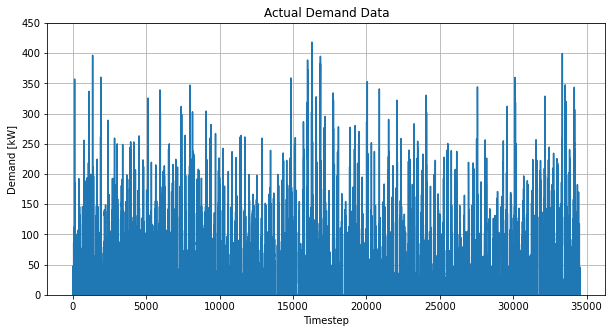

In [235]:
plt.figure(figsize=(10,5))
plt.plot(C.sum(axis=1))
plt.grid()
plt.title('Actual Demand Data')
plt.ylabel('Demand [kW]')
plt.ylim(0,450)
plt.xlabel('Timestep')

In [19]:
print(C.loc[16280])

C1     33.69
C2     90.03
C3     96.80
C4    108.23
C5      0.00
C6      0.00
C7      0.00
C8      0.00
Name: 16280, dtype: float64


# Create demand dataframe which does not exceed 300 kW

In [212]:
D = C.copy()
times = []

for i in range(len(C)):
    if C.iloc[i].sum() >= 300:
        D.iloc[i] = C.iloc[i].div(2)
        times.append(1)
    else:
        pass

D['sum'] = D.sum(axis=1)
D['step'] = C1[0]
percent = len(times)*100/34541
percent = "{:.2f}".format(percent)
print('demand exceeds 300 kW', str(len(times)), 'times. This is', str(percent), '% of the timesteps')
        

demand exceeds 300 kW 105 times. This is 0.30 % of the timesteps


In [213]:
D

,C1,C2,C3,C4,C5,C6,C7,C8,sum,step
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m4
...,...,...,...,...,...,...,...,...,...,...
34537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m34537
34538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m34538
34539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m34539
34540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m34540


Text(0.5, 0, 'Timestep')

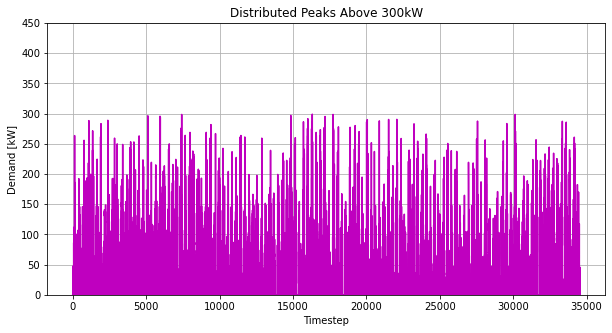

In [234]:
plt.figure(figsize= (10,5))
plt.plot(D['sum'], color = 'm')
plt.grid()
plt.title('Distributed Peaks Above 300kW')
plt.ylabel('Demand [kW]')
plt.ylim(0,450)
plt.xlabel('Timestep')

In [138]:
time = np.arange(0,34542,1)
ind = []

for i in range(len(time)):
    ind.append('m' + str(time[i]))

E = pd.concat([D['C1'], D['C2'],D['C3'],D['C4'],D['C5'], D['C6'],D['C7'],D['C8']], ignore_index = True)
indall = ind * 8
len(indall)
len(E)
charger = ['C1']*34542 + ['C2']*34542 + ['C3']*34542 + ['C4']*34542 + ['C5']*34542 + ['C6']*34542 + ['C7']*34542 + ['C8']*34542

a = indall
b = charger
c = []

for i in range(len(b)):
    c.append(str(a[i] + '.' + str(b[i])))
    
df4 = pd.DataFrame()
df4['timestep'] = c
df4['load'] = E

df4

,timestep,load
0,m0.C1,0.0
1,m1.C1,0.0
2,m2.C1,0.0
3,m3.C1,0.0
4,m4.C1,0.0
...,...,...
276331,m34537.C8,0.0
276332,m34538.C8,0.0
276333,m34539.C8,0.0
276334,m34540.C8,0.0


In [139]:
df4.to_csv('demand_winter300', sep=',',index = False)

# Create demand file distributing demand over 300 kW

In [120]:
f = C.copy()
times = []
rest = np.zeros(34542)

for i in range(len(f)):
    if f.iloc[i].sum() >= 300:
        rest[i] = f.iloc[i].sum() - 300
        f.iloc[i] = 37.5
        f.iloc[i+1] = f.iloc[i+1] + rest[i]/8
        
        times.append(i)
    else:
        pass
    
len(times)

143

In [121]:
f['sum'] = f.sum(axis=1)

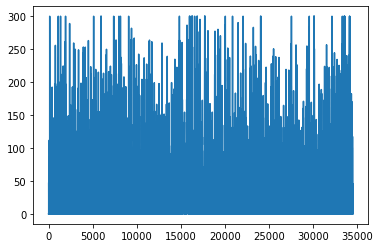

In [122]:
plt.plot(f['sum'])

In [123]:
sum(f['sum'])

1122820.1499999964

In [124]:
csum = C.sum(axis=1)
sum(csum)

1122820.1499999966

In [125]:
time = np.arange(0,34542,1)
ind = []

for i in range(len(time)):
    ind.append('m' + str(time[i]))

E = pd.concat([f['C1'], f['C2'],f['C3'],f['C4'],f['C5'], f['C6'],f['C7'],f['C8']], ignore_index = True)
indall = ind * 8
len(indall)
len(E)
charger = ['C1']*34542 + ['C2']*34542 + ['C3']*34542 + ['C4']*34542 + ['C5']*34542 + ['C6']*34542 + ['C7']*34542 + ['C8']*34542

a = indall
b = charger
c = []

for i in range(len(b)):
    c.append(str(a[i] + '.' + str(b[i])))
    
df4 = pd.DataFrame()
df4['timestep'] = c
df4['load'] = E

df4

,timestep,load
0,m0.C1,0.0
1,m1.C1,0.0
2,m2.C1,0.0
3,m3.C1,0.0
4,m4.C1,0.0
...,...,...
276331,m34537.C8,0.0
276332,m34538.C8,0.0
276333,m34539.C8,0.0
276334,m34540.C8,0.0


In [126]:
df4.to_csv('demand_winter_300distributed', sep=',',index = False)

# Run with new demand file

In [2]:
with open("EVCS_15_G.gms","r") as f:
    list_of_lines = f.readlines()
    
    
list_of_lines[35]

'$include demand_winter.tsv\n'

In [10]:
#In this cell changes are made manually to run three times with different demand files
#Remember to change the name of the db file in line 20

with open("EVCS_15_G.gms","r") as f:
    list_of_lines = f.readlines()
    
#list_of_lines[35] = "$include demand_winter.tsv\n"
#list_of_lines[35] = "$include demand_winter_reduced27december.tsv\n"
#list_of_lines[35] = "$include demand_winter_300reduced.tsv\n"
#list_of_lines[35] = "$include demand_winter_300distributed.tsv\n"
list_of_lines[35] = "$include demand_winter_350distributed.tsv\n"

print(list_of_lines[35])
    
with open("EVCS_15_G.gms", "w") as f:
    f.writelines(list_of_lines)
        
subprocess.run(["gams", "EVCS_15_G.gms", "logOption", "2"])
    
subprocess.run(["move", "EVCS_15_G_results.db", "EVCS_15_G1_350_results.db"], shell = True)


$include demand_winter_350distributed.tsv



CompletedProcess(args=['move', 'EVCS_15_G_results.db', 'EVCS_15_G1_350_results.db'], returncode=0)

In [9]:
all_files = glob.glob('EVCS_15_G*.db')

In [5]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_15_G*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[10:-11]] = grid_power['level'].copy()
    grid_ex_p[filename[10:-11]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[10:-11]] = grid_total_power['level'].copy()
    
    grid_e[filename[10:-11]] = grid_energy['level'].copy()
    grid_ex_e[filename[10:-11]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[10:-11]] = ESS_level['level'].copy()
    ESS_p[filename[10:-11]] = ESS_power['level'].copy()  
    
    sclrs[filename[10:-11]] = scalars['level'].copy()
    
    soc_pen[filename[10:-11]] = soc_penalty['level'].copy()


In [6]:
sclrs

,1200,300distributed,350distributed,OG,red27dec
0,219.470000,120.000000,170.000000,173.968750,173.968750
1,177.090000,185.444000,180.000000,222.591250,222.591250
2,980.530000,259.930435,265.477619,264.807500,223.340000
3,169.766923,207.632000,182.032000,180.000000,180.000000
4,180.000000,180.000000,180.000000,225.501250,225.501250
5,38626.720000,21120.000000,29920.000000,30618.500000,30618.500000
6,141379.537082,141336.091429,140897.427826,141094.161756,138121.839904
7,113570.321627,66363.765928,64569.275557,70553.808901,67567.328318
8,3603.447889,3602.265477,3602.265477,3602.265477,3585.892090
9,4.283482,4.283482,4.283482,4.283482,4.283482


In [7]:
sclrs = sclrs.set_index(scalars['name'])
sclrs.iloc[-1] = sclrs.iloc[-1] * 1.25
cols = sclrs.columns.tolist()
#cols = [cols[1] , cols[-1] , cols[0]]
#sclrs = sclrs[cols]
sclrs

,1200,300distributed,350distributed,OG,red27dec
name,,,,,
var_ess_rated_power,219.470000,120.000000,170.000000,173.968750,173.968750
var_grid_maxpower1,177.090000,185.444000,180.000000,222.591250,222.591250
var_grid_maxpower2,980.530000,259.930435,265.477619,264.807500,223.340000
var_grid_maxpower3,169.766923,207.632000,182.032000,180.000000,180.000000
var_grid_maxpower4,180.000000,180.000000,180.000000,225.501250,225.501250
var_ESS_cost,38626.720000,21120.000000,29920.000000,30618.500000,30618.500000
var_electricity_cost,141379.537082,141336.091429,140897.427826,141094.161756,138121.839904
var_grid_tariff_winter,113570.321627,66363.765928,64569.275557,70553.808901,67567.328318
var_energy_tax,3603.447889,3602.265477,3602.265477,3602.265477,3585.892090


Here we have 5 different results. 

300distributed - If the total demand exceeds 300 kW, the output is lowered and distributed over longer time

350distributed - Same as previous with higher treshold

1200           - One instance with 1200 kW on december 27

OG             - The real demand data is used

red27dec       - On december 27 the demand was significatly higher than the rest of the period, in this run the demand                  is reduced only on this day 

# Battery Size

Text(0.5, 1.0, 'Battery Size per caserun')

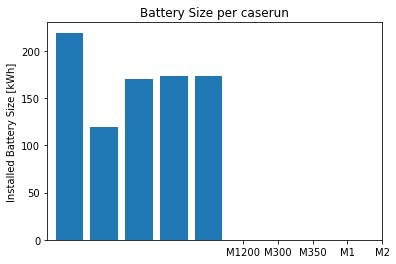

In [27]:
names = ['M1200', 'M300', 'M350', 'M1', 'M2']
y = sclrs.iloc[-1]
plt.bar(cols,y)
plt.ylabel('Installed Battery Size [kWh]')
plt.xticks(names)
plt.title('Battery Size per caserun')

# Costs

In [28]:
soc_pen.loc['sum'] = soc_pen.sum(numeric_only=True, axis = 0)
soc_pen = soc_pen[cols]
soc_pen.iloc[-1]

1200              24562.667500
300distributed    19956.460754
350distributed    23042.479444
OG                21786.705104
red27dec          21585.308542
Name: sum, dtype: float64

In [29]:
soc_pen

,1200,300distributed,350distributed,OG,red27dec
0,0.0000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
34538,0.0000,0.000000,0.000000,0.000000,0.000000
34539,0.0000,0.000000,0.000000,0.000000,0.000000
34540,0.0000,0.000000,0.000000,0.000000,0.000000
34541,0.0000,0.000000,0.000000,0.000000,0.000000


In [30]:
sclrs.iloc[-2] = sclrs.iloc[-2] - soc_pen.iloc[-1]*0.2
sclrs

,1200,300distributed,350distributed,OG,red27dec
name,,,,,
var_ess_rated_power,219.470000,120.000000,170.000000,173.968750,173.968750
var_grid_maxpower1,177.090000,185.444000,180.000000,222.591250,222.591250
var_grid_maxpower2,980.530000,259.930435,265.477619,264.807500,223.340000
var_grid_maxpower3,169.766923,207.632000,182.032000,180.000000,180.000000
var_grid_maxpower4,180.000000,180.000000,180.000000,225.501250,225.501250
var_ESS_cost,38626.720000,21120.000000,29920.000000,30618.500000,30618.500000
var_electricity_cost,141379.537082,141336.091429,140897.427826,141094.161756,138121.839904
var_grid_tariff_winter,113570.321627,66363.765928,64569.275557,70553.808901,67567.328318
var_energy_tax,3603.447889,3602.265477,3602.265477,3602.265477,3585.892090


Text(0, 0.5, 'System Costs [NOK]')

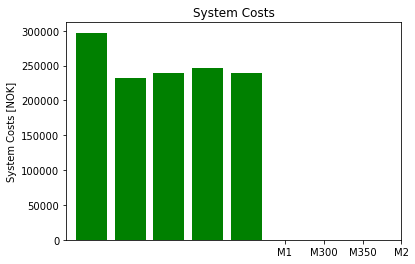

In [31]:
names = ['M1', 'M300', 'M350', 'M2']
syscost = sclrs.iloc[-2]
plt.bar(cols,syscost, color = 'g')
plt.xticks(names)
plt.title('System Costs')
plt.ylabel('System Costs [NOK]')

In [18]:
# System costs differ by about 5%

The total system costs don't change much, but how much of the system costs is due to the grid tariff? If either the tariff changes or the max power increases

In [32]:
sclrs.loc['tariff_percent'] = [0,0,0,0,0]
sclrs.loc['tariff_percent'] = sclrs.iloc[-6]*100/sclrs.iloc[-3]
sclrs

,1200,300distributed,350distributed,OG,red27dec
name,,,,,
var_ess_rated_power,219.470000,120.000000,170.000000,173.968750,173.968750
var_grid_maxpower1,177.090000,185.444000,180.000000,222.591250,222.591250
var_grid_maxpower2,980.530000,259.930435,265.477619,264.807500,223.340000
var_grid_maxpower3,169.766923,207.632000,182.032000,180.000000,180.000000
var_grid_maxpower4,180.000000,180.000000,180.000000,225.501250,225.501250
var_ESS_cost,38626.720000,21120.000000,29920.000000,30618.500000,30618.500000
var_electricity_cost,141379.537082,141336.091429,140897.427826,141094.161756,138121.839904
var_grid_tariff_winter,113570.321627,66363.765928,64569.275557,70553.808901,67567.328318
var_energy_tax,3603.447889,3602.265477,3602.265477,3602.265477,3585.892090


In [7]:
grid_ex_e

,1200,300distributed,300,350distributed,OG,red27dec
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
34537,0.0,0.0,0.0,0.0,0.0,0.0
34538,0.0,0.0,0.0,0.0,0.0,0.0
34539,0.0,0.0,0.0,0.0,0.0,0.0
34540,0.0,0.0,0.0,0.0,0.0,0.0
